# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import math

## importing dataset

In [2]:
dataset = pd.read_csv('Table - IN_Table.csv.csv')
dataset.describe();

In [3]:
print(dataset)

            IN1       IN2       IN3       IN4       IN5      Out1      Out2
0      0.077744  0.795565 -0.665503  0.879321  0.134419 -0.122686  0.123661
1      0.080313  0.824595 -0.655447  0.875636  0.134941 -0.122686  0.123661
2      0.087355  0.776258 -0.650550  0.884105  0.132452 -0.026857  0.123661
3      0.091774  0.739149 -0.644934  0.892043  0.131287 -0.026857  0.251010
4      0.091166  0.761332 -0.648654  0.892752  0.136788 -0.026857  0.251010
...         ...       ...       ...       ...       ...       ...       ...
14396 -2.371841 -1.399878 -2.594168 -0.861832 -1.607387 -2.039274 -1.531870
14397 -2.378745 -1.407683 -2.601522 -0.871577 -1.604817 -2.039274 -1.531870
14398 -2.385070 -1.388787 -2.606594 -0.880330 -1.579605 -1.943445 -1.659219
14399 -2.386119 -1.372492 -2.615738 -0.886744 -1.556761 -1.943445 -1.659219
14400 -2.382557 -1.357018 -2.612316 -0.888799 -1.535844 -1.943445 -1.659219

[14401 rows x 7 columns]


In [4]:
dataset.dropna() 

,IN1,IN2,IN3,IN4,IN5,Out1,Out2
0,0.077744,0.795565,-0.665503,0.879321,0.134419,-0.122686,0.123661
1,0.080313,0.824595,-0.655447,0.875636,0.134941,-0.122686,0.123661
2,0.087355,0.776258,-0.650550,0.884105,0.132452,-0.026857,0.123661
3,0.091774,0.739149,-0.644934,0.892043,0.131287,-0.026857,0.251010
4,0.091166,0.761332,-0.648654,0.892752,0.136788,-0.026857,0.251010
...,...,...,...,...,...,...,...
14396,-2.371841,-1.399878,-2.594168,-0.861832,-1.607387,-2.039274,-1.531870
14397,-2.378745,-1.407683,-2.601522,-0.871577,-1.604817,-2.039274,-1.531870
14398,-2.385070,-1.388787,-2.606594,-0.880330,-1.579605,-1.943445,-1.659219
14399,-2.386119,-1.372492,-2.615738,-0.886744,-1.556761,-1.943445,-1.659219


In [5]:
def outlier(dataset):
    for column in dataset.columns:
        dataset[column] = dataset[column].astype(float)
        median = st.median(dataset[column])
        std_dev = np.std(dataset[column])
        lower_bound = median - 3*std_dev
        upper_bound = median + 3*std_dev
        dataset = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]
    return dataset
dataset_c = outlier(dataset)
dataset_c.dropna(inplace=True)
dataset_c.describe()

C:\Users\Abhishek Gonnade\AppData\Local\Temp\ipykernel_22600\2285577944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = dataset[column].astype(float)


,IN1,IN2,IN3,IN4,IN5,Out1,Out2
count,14014.000000,14014.000000,14014.000000,14014.000000,14014.000000,14014.000000,14014.000000
mean,0.012522,0.020190,0.008128,0.025368,-0.010260,-0.001105,-0.006577
std,0.985636,0.995023,0.984860,0.991940,0.970358,0.923232,0.883825
min,-2.634673,-2.422492,-2.631096,-2.354538,-1.934470,-2.805909,-2.805356
25%,-0.286878,-0.918594,-0.292456,-0.877885,-0.709796,-0.506004,-0.513082
50%,0.366122,0.621044,0.225352,0.515633,-0.042572,0.164802,-0.003688
75%,0.680357,0.763112,0.400686,0.887366,0.566638,0.643949,0.505707
max,1.530461,1.939639,1.844610,1.654608,2.957842,3.135513,2.797981


## Removing outliers

In [6]:
import seaborn as sns
#sns.displot(dataset)

<Axes: >

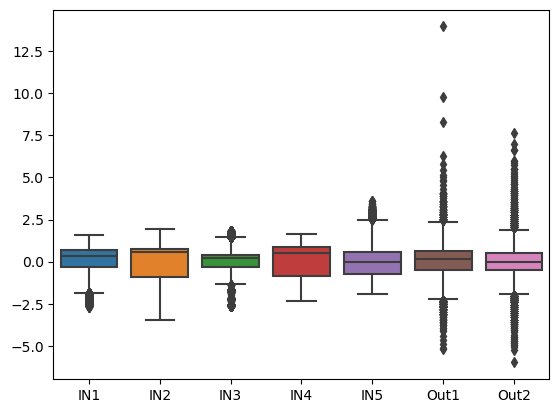

In [7]:
sns.boxplot(dataset)

In [8]:
def outliers(dataset):
    for columns in dataset.columns:
        q1 = dataset[columns].quantile(0.25)
        q3 = dataset[columns].quantile(0.75)
        iqr = q3-q1
        upper_limit = q3 + 1.5*iqr
        lower_limit = q1 - 1.5*iqr
        #capping
        dataset_c = dataset.copy()
        dataset_c.loc[(dataset_c[columns] > upper_limit),columns] = upper_limit
        dataset_c.loc[(dataset_c[columns] < lower_limit),columns] = lower_limit
    return dataset_c

    
#dataset_c = outliers(dataset)
#dataset_c.describe()

# Error Detail

In [9]:
def result(y_test,y_pred,k):
  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_squared_error,mean_absolute_error
  from math import pi,log
  
  r2 = r2_score(y_test,y_pred)
  n = len(y_test)
  SSE= mean_squared_error(y_test,y_pred)
  MAE = mean_absolute_error(y_test,y_pred)
  aic = 2*k + n*log(2*math.pi) + n*log(SSE/n) + n
  bic = k*log(n) + n*math.log(2*pi) + n*log(SSE/n) + n
  print('R2_score :',r2)
  print('SSE :',SSE)
  print('MAE :',MAE)
  print('aic :',aic)
  print('bic :',bic)

# KNN

In [10]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out1']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [13]:
y_pred_knn = knn.predict(X_test)

In [14]:
result(y_test,y_pred_knn,5)

R2_score : 0.6956284034937315
SSE : 0.2537100869279591
MAE : 0.33300396169203117
aic : -18131.384702830765
bic : -18101.69247507494


# Polynomial Regression

In [15]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out1']

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size = 0.2,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()
poly_reg.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred_poly = poly_reg.predict(X_test)

In [20]:
result(y_test,y_pred_poly,5)

R2_score : 0.5316719051314773
SSE : 0.39037664165700575
MAE : 0.4605147523542564
aic : -16923.51651509596
bic : -16893.824287340132


# Linear Regression

In [21]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out1']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred_lin = lin_reg.predict(X_test)

In [25]:
result(y_test,y_pred_lin,5)

R2_score : 0.5037888675042501
SSE : 0.41361865234861006
MAE : 0.47190470826437003
aic : -16761.412301247583
bic : -16731.720073491757


In [26]:
lin_reg.coef_

array([0.13687528, 0.15691683, 0.32220493, 0.03659179, 0.23094313])

In [27]:
lin_reg.intercept_

-0.010470459656081652

# Early Stopping Funtion

In [28]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
    monitor="loss",
    min_delta = 0.0001,
    patience = 200,
    restore_best_weights = True,
)

In [29]:
import tensorflow as tf
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

class R2ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(R2ScoreCallback, self).__init__()
        self.validation_data = validation_data
        self.r2_scores = [] 

    def on_epoch_end(self, epoch, logs=None):
        val_x, val_y = self.validation_data
        val_predictions = self.model.predict(val_x)
        r2 = r2_score(val_y, val_predictions)
        self.r2_scores.append(r2)
        if epoch % 20 == 0 and epoch != 0:
            print(f"Epoch {epoch}: R2 Score = {r2}")

    def on_train_end(self, logs=None):
        plt.figure(figsize=(10, 6))
        plt.plot(self.r2_scores, label='R² Score')
        plt.xlabel('Epoch')
        plt.ylabel('R2 Score')
        plt.title('R2 Score over Epochs')
        plt.legend()
        plt.show()
    


# Neural Network

In [30]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out1']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Epoch 1/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   - loss: 0.4342 - mae: 0
701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4340 - mae: 0.4862
Epoch 2/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.3854 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3854 - mae: 0.4594
Epoch 3/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 0.3765 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3764 - mae: 0.4527
Epoch 4/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.3621 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3619 - mae: 0.4443
Epoch 5/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.3483 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3483 - mae: 0.4379
Epoch 6/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.3436 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3436 - mae: 0.4344
Epoch 7/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.3454 - mae: 0.4
701/701 ━━━━━━━━━━━━━━━━━━━━ 

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.2429 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2431 - mae: 0.3614
Epoch 39/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.2531 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2531 - mae: 0.3683
Epoch 40/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 0.2433 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2433 - mae: 0.3646
Epoch 41/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.2418 - mae: 0.3
Epoch 40: R2 Score = 0.6952101151214818
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2419 - mae: 0.3615
Epoch 42/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2409 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2410 - mae: 0.3579
Epoch 43/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2483 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2483 - mae: 0.3617
Epoch 44/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.2369 - ma

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.2182 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2181 - mae: 0.3387
Epoch 76/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.2105 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2105 - mae: 0.3329
Epoch 77/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 0.2155 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2155 - mae: 0.3375
Epoch 78/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.2128 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2129 - mae: 0.3321
Epoch 79/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.2067 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2068 - mae: 0.3319
Epoch 80/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.2076 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2077 - mae: 0.3320
Epoch 81/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.2186 - mae: 0.3
Epoch 80: R2 Score = 0.7192942109

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.1775 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1779 - mae: 0.3080
Epoch 113/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.1805 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1806 - mae: 0.3095
Epoch 114/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.1890 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1890 - mae: 0.3115
Epoch 115/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.1849 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1850 - mae: 0.3071
Epoch 116/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.1850 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1851 - mae: 0.3110
Epoch 117/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1846 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1846 - mae: 0.3085
Epoch 118/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.1805 - mae: 0.3
701/701 ━━━━━━━━━━━━━━━━━━━

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1696 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1697 - mae: 0.2931
Epoch 150/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 0.1645 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1646 - mae: 0.2897
Epoch 151/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.1638 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1638 - mae: 0.2912
Epoch 152/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.1578 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1578 - mae: 0.2835
Epoch 153/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.1683 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1684 - mae: 0.2954
Epoch 154/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.1722 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1721 - mae: 0.2922
Epoch 155/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 0.1682 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.1536 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1537 - mae: 0.2811
Epoch 187/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.1539 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1541 - mae: 0.2779
Epoch 188/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.1560 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1560 - mae: 0.2792
Epoch 189/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.1532 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1532 - mae: 0.2768
Epoch 190/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.1607 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1606 - mae: 0.2834
Epoch 191/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.1516 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1516 - mae: 0.2756
Epoch 192/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.1548 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 0.1478 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1478 - mae: 0.2734
Epoch 224/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.1525 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1523 - mae: 0.2742
Epoch 225/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1371 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1375 - mae: 0.2642
Epoch 226/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.1436 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1437 - mae: 0.2690
Epoch 227/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1401 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1402 - mae: 0.2669
Epoch 228/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 0.1449 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1450 - mae: 0.2688
Epoch 229/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 0.1435 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 0.1330 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1330 - mae: 0.2549
Epoch 261/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.1332 - mae: 0.2
Epoch 260: R2 Score = 0.7526461338824608
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1333 - mae: 0.2540
Epoch 262/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.1410 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1410 - mae: 0.2625
Epoch 263/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.1300 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1302 - mae: 0.2564
Epoch 264/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.1347 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1347 - mae: 0.2566
Epoch 265/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1383 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1383 - mae: 0.2619
Epoch 266/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.13

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.1349 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1349 - mae: 0.2557
Epoch 298/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.1271 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1271 - mae: 0.2481
Epoch 299/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.1372 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1371 - mae: 0.2573
Epoch 300/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.1227 - mae: 0.2
701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1229 - mae: 0.2475


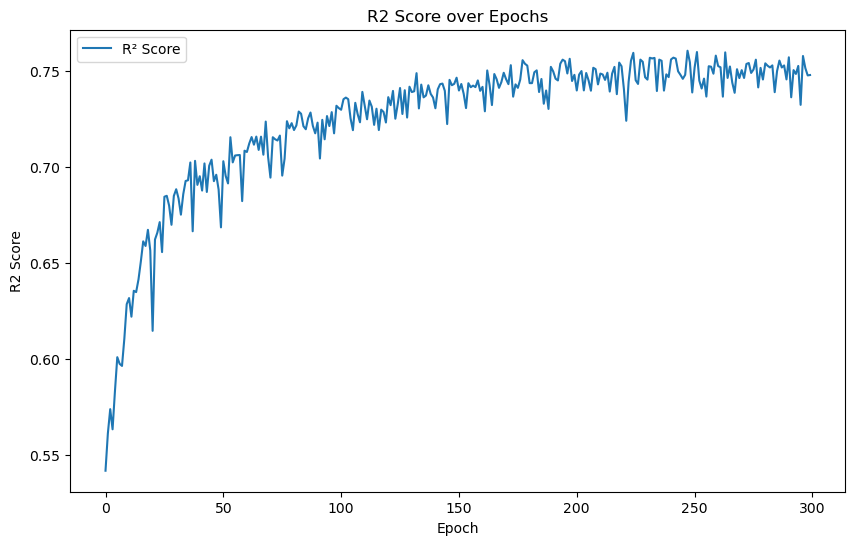

In [31]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
#first layer
#ann.add(tf.keras.layers.Dense(units=50,activation='relu'))
#second layer
#ann.add(tf.keras.layers.Dense(units = 50,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

#output
ann.add(tf.keras.layers.Dense(units=1))
#compiling
ann.compile(optimizer='adam',loss='mse',metrics=['mae'])
#training
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
ann.fit(X_train,y_train,batch_size = 16,callbacks = [r2_callback],epochs = 300)


<Axes: >

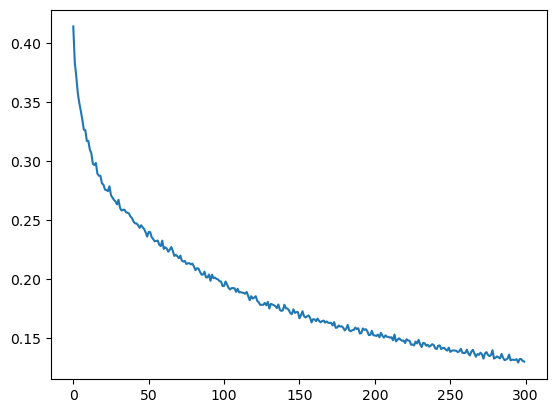

In [32]:
ann_df = pd.DataFrame(ann.history.history)
ann_df['loss'].plot()

In [33]:
y_pred_ann = ann.predict(X_test)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step


In [34]:
result(y_test,y_pred_ann,5)

R2_score : 0.7479822676925441
SSE : 0.21007032688017233
MAE : 0.32719482715060233
aic : -18660.45056189492
bic : -18630.758334139093


In [35]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 500)                 │           3,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,513,505 (5.77 MB)

 Trainable params: 504,501 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,009,004 (3.85 MB)

# LSTM

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

X = dataset_c.loc[:, ['IN1', 'IN2', 'IN3', 'IN4', 'IN5']]
y = dataset_c.loc[:, 'Out1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

timesteps = 5
features = X_train.shape[1]

X_train = np.array(X_train).reshape((X_train.shape[0], timesteps, features // timesteps))
X_test = np.array(X_test).reshape((X_test.shape[0], timesteps, features // timesteps))

y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

lstm_model = tf.keras.models.Sequential([
    layers.LSTM(units=50 ,activation='tanh', return_sequences=True, input_shape=(timesteps, features // timesteps)),
    layers.Dropout(0.05),
    #layers.LSTM(units=50 activation='tanh',return_sequences = True),
    #layers.Dropout(0.05),
    layers.LSTM(units=50,activation='tanh'),
    layers.Dropout(0.05),
    layers.Dense(units=1),
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))

lstm_model.fit(X_train, y_train, batch_size=32,callbacks = [r2_callback], epochs=1000)


Epoch 1/1000


C:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   - loss: 0.5244 - mae: 0.
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5236 - mae: 0.5448
Epoch 2/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.4453 - mae: 0.5
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4450 - mae: 0.4998
Epoch 3/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.4138 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4141 - mae: 0.4781
Epoch 4/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.4236 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4233 - mae: 0.4795
Epoch 5/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.4091 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4091 - mae: 0.4722
Epoch 6/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.4024 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4026 - mae: 0.4690
Epoch 7/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.3979 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3m

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.3247 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3248 - mae: 0.4255
Epoch 39/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.3400 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3397 - mae: 0.4346
Epoch 40/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.3387 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3387 - mae: 0.4332
Epoch 41/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.3275 - mae: 0.4
Epoch 40: R2 Score = 0.6233344449576608
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3275 - mae: 0.4243
Epoch 42/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.3231 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3231 - mae: 0.4222
Epoch 43/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.3264 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3263 - mae: 0.4294
Epoch 44/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.334

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.2941 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2941 - mae: 0.4037
Epoch 76/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.2915 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2915 - mae: 0.4051
Epoch 77/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.2980 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2980 - mae: 0.4011
Epoch 78/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.2963 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2963 - mae: 0.4048
Epoch 79/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.3136 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3127 - mae: 0.4133
Epoch 80/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.2939 - mae: 0.4
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2939 - mae: 0.4019
Epoch 81/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.2849 - mae: 0.3
Epoch 80: R2 Score = 0.6653

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step- loss: 0.2782 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2780 - mae: 0.3930
Epoch 113/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.2663 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2664 - mae: 0.3843
Epoch 114/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.2598 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2599 - mae: 0.3807
Epoch 115/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2772 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2771 - mae: 0.3917
Epoch 116/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2618 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2619 - mae: 0.3783
Epoch 117/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2575 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2582 - mae: 0.3803
Epoch 118/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.2717 - mae: 0.3
351/351 ━━━━━━━━━━━━━

Epoch 149/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.2593 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2592 - mae: 0.3794
Epoch 150/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.2455 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2459 - mae: 0.3671
Epoch 151/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2602 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2600 - mae: 0.3758
Epoch 152/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step- loss: 0.2511 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2511 - mae: 0.3733
Epoch 153/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.2418 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2421 - mae: 0.3670
Epoch 154/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.2528 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2528 - mae: 0.3733
Epoch 155/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.2541 - mae: 0.3
351/35

Epoch 186/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.2357 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2357 - mae: 0.3616
Epoch 187/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.2381 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2380 - mae: 0.3587
Epoch 188/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.2384 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2382 - mae: 0.3600
Epoch 189/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.2381 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2380 - mae: 0.3642
Epoch 190/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.2423 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2423 - mae: 0.3629
Epoch 191/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.2302 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2304 - mae: 0.3545
Epoch 192/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.2346 - mae: 0.3
351/35

Epoch 223/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.2188 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2188 - mae: 0.3458
Epoch 224/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.2156 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2160 - mae: 0.3446
Epoch 225/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.2258 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2258 - mae: 0.3552
Epoch 226/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.2221 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2221 - mae: 0.3465
Epoch 227/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.2237 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2237 - mae: 0.3499
Epoch 228/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step- loss: 0.2156 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2156 - mae: 0.3418
Epoch 229/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.2090 - mae: 0.3
351/35

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.2126 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2127 - mae: 0.3379
Epoch 261/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.2104 - mae: 0.3
Epoch 260: R2 Score = 0.7458777595117044
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2104 - mae: 0.3399
Epoch 262/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.2114 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2113 - mae: 0.3386
Epoch 263/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step- loss: 0.2063 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2065 - mae: 0.3365
Epoch 264/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.2038 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2040 - mae: 0.3345
Epoch 265/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.2125 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2125 - mae: 0.3379
Epoch 266/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss

Epoch 297/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.2101 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2099 - mae: 0.3332
Epoch 298/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.2026 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2026 - mae: 0.3289
Epoch 299/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.2010 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2010 - mae: 0.3320
Epoch 300/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1961 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1965 - mae: 0.3285
Epoch 301/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.2032 - mae: 0.3
Epoch 300: R2 Score = 0.7494664558483703
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2032 - mae: 0.3298
Epoch 302/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.1899 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1902 - mae: 0.3240
Epoch 303/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 97

Epoch 334/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1980 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1978 - mae: 0.3245
Epoch 335/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.2009 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2009 - mae: 0.3304
Epoch 336/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1985 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1985 - mae: 0.3219
Epoch 337/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1817 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1824 - mae: 0.3178
Epoch 338/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.1923 - mae: 0.32
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1923 - mae: 0.3254
Epoch 339/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.1892 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1893 - mae: 0.3212
Epoch 340/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.1903 - mae: 0.3
351/351

Epoch 371/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.1840 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1841 - mae: 0.3148
Epoch 372/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1983 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1982 - mae: 0.3257
Epoch 373/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   - loss: 0.1809 - mae: 0.31
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1811 - mae: 0.3124
Epoch 374/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.1855 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1856 - mae: 0.3183
Epoch 375/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.1833 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1834 - mae: 0.3162
Epoch 376/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.1818 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1819 - mae: 0.3133
Epoch 377/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1945 - mae: 0.3
351/3

Epoch 408/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1807 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1808 - mae: 0.3110
Epoch 409/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1775 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1775 - mae: 0.3081
Epoch 410/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1768 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1768 - mae: 0.3076
Epoch 411/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.1679 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1682 - mae: 0.3030
Epoch 412/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1807 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1806 - mae: 0.3119
Epoch 413/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1879 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1879 - mae: 0.3127
Epoch 414/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.1796 - mae: 0.3
351/35

Epoch 445/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.1726 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1728 - mae: 0.3046
Epoch 446/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1848 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1848 - mae: 0.3122
Epoch 447/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.1751 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1751 - mae: 0.3067
Epoch 448/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.1781 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1781 - mae: 0.3091
Epoch 449/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1738 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1739 - mae: 0.3057
Epoch 450/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.1757 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1757 - mae: 0.3080
Epoch 451/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1738 - mae: 0.3
351/35

Epoch 482/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1730 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1730 - mae: 0.3046
Epoch 483/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.1759 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1758 - mae: 0.3060
Epoch 484/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.1730 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1730 - mae: 0.3026
Epoch 485/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.1729 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1729 - mae: 0.3040
Epoch 486/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.1714 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1714 - mae: 0.3025
Epoch 487/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1753 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1752 - mae: 0.3065
Epoch 488/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.1701 - mae: 0.3
351/35

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1646 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1646 - mae: 0.2959
Epoch 520/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   - loss: 0.1733 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1732 - mae: 0.3029
Epoch 521/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.1731 - mae: 0.3
Epoch 520: R2 Score = 0.7792409180456421
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1730 - mae: 0.3033
Epoch 522/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1695 - mae: 0.3
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1694 - mae: 0.3005
Epoch 523/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step p - loss: 0.1645 - mae:
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1646 - mae: 0.2974
Epoch 524/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.1619 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1619 - mae: 0.2930
Epoch 525/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.16

Epoch 556/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.1544 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1545 - mae: 0.2871
Epoch 557/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.1625 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1625 - mae: 0.2914
Epoch 558/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.1612 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1613 - mae: 0.2939
Epoch 559/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.1644 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1645 - mae: 0.2962
Epoch 560/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.1655 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1654 - mae: 0.2959
Epoch 561/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.1603 - mae: 0.2
Epoch 560: R2 Score = 0.7687570206342721
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1604 - mae: 0.2929
Epoch 562/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 87

Epoch 593/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.1566 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1567 - mae: 0.2889
Epoch 594/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1504 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1507 - mae: 0.2838
Epoch 595/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1600 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1601 - mae: 0.2939
Epoch 596/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.1572 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1573 - mae: 0.2891
Epoch 597/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.1634 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1633 - mae: 0.2948
Epoch 598/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.1638 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1638 - mae: 0.2970
Epoch 599/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.1594 - mae: 0.2
351/35

Epoch 630/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.1528 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1530 - mae: 0.2862
Epoch 631/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.1573 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1573 - mae: 0.2883
Epoch 632/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.1504 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1504 - mae: 0.2852
Epoch 633/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.1593 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1593 - mae: 0.2903
Epoch 634/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step- loss: 0.1569 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1568 - mae: 0.2871
Epoch 635/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.1551 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1552 - mae: 0.2882
Epoch 636/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.1541 - mae: 0.2
351/35

Epoch 667/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1514 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1514 - mae: 0.2845
Epoch 668/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1586 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1585 - mae: 0.2890
Epoch 669/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1535 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1536 - mae: 0.2859
Epoch 670/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.1496 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1497 - mae: 0.2819
Epoch 671/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.1537 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1537 - mae: 0.2879
Epoch 672/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.1480 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1482 - mae: 0.2793
Epoch 673/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   - loss: 0.1545 - mae: 0.28
351/3

Epoch 704/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.1458 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1460 - mae: 0.2792
Epoch 705/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.1574 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1572 - mae: 0.2887
Epoch 706/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.1494 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1494 - mae: 0.2828
Epoch 707/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.1499 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1500 - mae: 0.2840
Epoch 708/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.1485 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1486 - mae: 0.2795
Epoch 709/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.1542 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1541 - mae: 0.2839
Epoch 710/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.1483 - mae: 0.2
351/35

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1481 - mae: 0.2
Epoch 740: R2 Score = 0.7768896627715225
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1479 - mae: 0.2839
Epoch 742/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.1413 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1414 - mae: 0.2740
Epoch 743/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.1396 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1399 - mae: 0.2737
Epoch 744/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.1458 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1458 - mae: 0.2801
Epoch 745/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.1480 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1479 - mae: 0.2762
Epoch 746/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1482 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1482 - mae: 0.2787
Epoch 747/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss

Epoch 778/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.1513 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1512 - mae: 0.2824
Epoch 779/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.1424 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1426 - mae: 0.2740
Epoch 780/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.1425 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1425 - mae: 0.2752
Epoch 781/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.1441 - mae: 0.2
Epoch 780: R2 Score = 0.7827456889811957
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1442 - mae: 0.2726
Epoch 782/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.1487 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1486 - mae: 0.2771
Epoch 783/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.1513 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1511 - mae: 0.2787
Epoch 784/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 85

Epoch 815/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   - loss: 0.1393 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1394 - mae: 0.2728
Epoch 816/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.1418 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1419 - mae: 0.2745
Epoch 817/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1397 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1397 - mae: 0.2731
Epoch 818/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1422 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1423 - mae: 0.2738
Epoch 819/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   - loss: 0.1348 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1350 - mae: 0.2700
Epoch 820/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1429 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1429 - mae: 0.2749
Epoch 821/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step- loss: 0.1386 - mae: 0.2
Epoch 82

Epoch 852/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1418 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1419 - mae: 0.2729
Epoch 853/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1426 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1425 - mae: 0.2762
Epoch 854/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1378 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1380 - mae: 0.2677
Epoch 855/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.1365 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1366 - mae: 0.2687
Epoch 856/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1477 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1476 - mae: 0.2757
Epoch 857/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.1396 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1395 - mae: 0.2750
Epoch 858/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.1418 - mae: 0.2
351/351 

Epoch 889/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.1421 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1420 - mae: 0.2707
Epoch 890/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1375 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1375 - mae: 0.2673
Epoch 891/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1377 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1378 - mae: 0.2701
Epoch 892/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step p - loss: 0.1377 - mae: 0
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1376 - mae: 0.2679
Epoch 893/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 0.1377 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1377 - mae: 0.2703
Epoch 894/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.1391 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1391 - mae: 0.2674
Epoch 895/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.1351 - mae: 0.2
351/351 

Epoch 926/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.1343 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1343 - mae: 0.2683
Epoch 927/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.1364 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1364 - mae: 0.2674
Epoch 928/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.1376 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1376 - mae: 0.2700
Epoch 929/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.1341 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1340 - mae: 0.2666
Epoch 930/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.1372 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1373 - mae: 0.2676
Epoch 931/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.1382 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1382 - mae: 0.2726
Epoch 932/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.1300 - mae: 0.2
351/35

Epoch 963/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.1276 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1277 - mae: 0.2602
Epoch 964/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.1369 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1369 - mae: 0.2653
Epoch 965/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.1356 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1356 - mae: 0.2653
Epoch 966/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.1292 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1293 - mae: 0.2614
Epoch 967/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.1334 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1334 - mae: 0.2673
Epoch 968/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.1337 - mae: 0.2
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1337 - mae: 0.2681
Epoch 969/1000
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.1307 - mae: 0.2
351/35

In [ ]:
lstm_model_df = pd.DataFrame(lstm_model.history.history)
lstm_model_df['loss'].plot();

In [ ]:
y_pred_lstm = lstm_model.predict(X_test)
result(y_test,y_pred_lstm,5)

In [ ]:
lstm_model.summary()

# LSTM 2

In [ ]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out1']
Xy = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5','Out1']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
Xy = sc.fit_transform(Xy)
X1 = Xy[:,:-1]
y1 = Xy[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.2,random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
import tensorflow as tf
from keras.layers import LSTM
model = tf.keras.models.Sequential()

model.add(LSTM(units = 256,activation='tanh', return_sequences=True, input_shape=(1,5)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(LSTM(units = 256,activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.1))
model.add(LSTM(units = 256,activation='tanh'))
model.add(tf.keras.layers.Dropout(0.1))
#output
model.add(tf.keras.layers.Dense(units=1))
#compiling
model.compile(optimizer='adam',loss='mse')
loss = model.evaluate(X_test, y_test, verbose=2)
#training
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
model.fit(X_train,y_train,batch_size = 64,callbacks = [r2_callback],epochs = 1000)

In [ ]:
y_pred_model = model.predict(X_test)
result(y_test,y_pred_model,5)

In [ ]:
model.summary()

# PCA

In [ ]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out1']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnp = KNeighborsRegressor(n_neighbors = 3)
knnp.fit(X_train,y_train)

In [ ]:
y_pred_knnp = knnp.predict(X_test)
result(y_test,y_pred_knnp,3)